In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv')

In [14]:
#duplicates
city_df = city_df.drop_duplicates('city', keep = 'first')

In [15]:
#merge
cityride_df = city_df.merge(ride_df, on = 'city')
#cityride_df.head()

In [16]:
#group into cities
city_group = cityride_df.groupby('city')

#average fare
avg_fare = city_group.mean()['fare']

#total riders
total_rides = city_group['ride_id'].count()

#total drivers
total_drivers = city_group.mean()['driver_count']

#city type
city_type = city_df.set_index('city')['type']

#city specs
city_specs = pd.DataFrame({
    "Number of Rides": total_rides,
    "Average Fare": avg_fare,
    "Number of Drivers": total_drivers,
    "Type of City": city_type
})

city_specs.sort_values('Number of Drivers', ascending = False)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Davidtown,22.978095,73.0,21,Urban
South Bryanstad,24.598571,73.0,21,Urban
Williamshire,26.990323,70.0,31,Urban
West Sydneyhaven,22.368333,70.0,18,Urban
Torresshire,24.207308,70.0,26,Urban
Fosterside,23.034583,69.0,24,Urban
Spencertown,23.681154,68.0,26,Urban
Alyssaberg,20.609615,67.0,26,Urban
Smithhaven,22.788889,67.0,27,Urban
Lisaville,28.428929,66.0,28,Urban


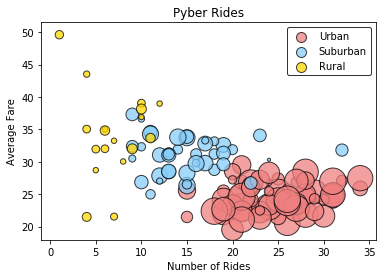

In [17]:
#city types
urban_df = city_specs[city_specs['Type of City'] == 'Urban']
suburban_df = city_specs[city_specs['Type of City'] == 'Suburban']
rural_df = city_specs[city_specs['Type of City'] == 'Rural']

#pyber colors
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
pyber_colors = {'Urban': colors['Light Coral'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Gold']}


#scatterplots
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df['Number of Drivers']*10, color = pyber_colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df['Number of Drivers']*10, color = pyber_colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df['Number of Drivers']*10, color = pyber_colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

plt.title('Pyber Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Average Fare')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

plt.show()

In [18]:
#pie groups
pie_groups = cityride_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

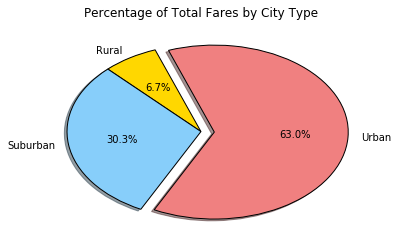

In [19]:
#total fare
percent_total_fare = pie_groups.sum()['fare']

fare_labels = percent_total_fare.index
fare_colors = [pyber_colors[n] for n in fare_labels]
fare_explode = [0 , 0, .1]
plt.pie(percent_total_fare, startangle = 110, colors = fare_colors, explode = fare_explode, labels = fare_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})

plt.title('Percentage of Total Fares by City Type')
plt.show()

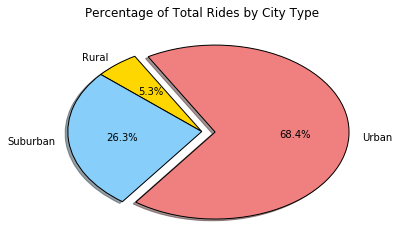

In [20]:
#total rides
percent_total_rides = pie_groups.count()['ride_id']

ride_labels = percent_total_rides.index
ride_colors = [pyber_colors[n] for n in ride_labels]
ride_explode = [0 , 0, .1]

plt.pie(percent_total_rides, startangle = 120, explode = ride_explode, colors = ride_colors, labels = ride_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
plt.title('Percentage of Total Rides by City Type')
plt.show()

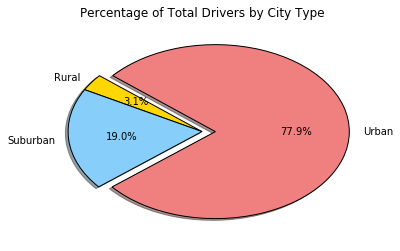

In [21]:
#total drivers
percent_total_drivers = city_df.groupby('type').sum()['driver_count']

driver_labels = percent_total_drivers.index
driver_colors = [pyber_colors[n] for n in driver_labels]
driver_explode = [0 , 0, .1]

plt.pie(percent_total_drivers, startangle = 140, explode = driver_explode, colors = driver_colors, labels = driver_labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})
plt.title('Percentage of Total Drivers by City Type')
plt.show()

In [22]:
#1. Urban areas contain the largest amount of rides taken.
#2. Urban areas have the largest amount of drivers available.
#3. Urban areas show more frequent and shorter trips, rural areas show fewer and longer trips,
#   and suburban areas are more balanced between the two.